## Decisive Distributions

### Import Dependencies

In [26]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi

# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

Python-dotenv could not parse statement starting at line 1


In [27]:
# Setup Alpaca API environment
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

### Read in stock data using Alpaca API

In [28]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set the stock tickers
tickers = ["SPY", "LUV", "DIS", "AAPL", "SBUX", "WORK"]

# Get 1 year's worth of historical data for all stocks
# HINT: Set "limit" to 10000 so all ticker rows are captured from get_bars()
df_ticker = api.get_bars(tickers, timeframe, start = start_date, end = end_date, limit = 10000).df

# Display sample data
df_ticker.head(10)

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2019-05-01 04:00:00+00:00,210.20,215.3100,209.230,210.52,64827505,441450,212.670859,AAPL
2019-05-02 04:00:00+00:00,209.65,212.6500,208.130,209.15,32000324,233410,210.155469,AAPL
2019-05-03 04:00:00+00:00,210.78,211.8400,210.230,211.75,21092378,148449,211.161771,AAPL
2019-05-06 04:00:00+00:00,204.16,208.8400,203.500,208.48,32444375,236173,207.309513,AAPL
2019-05-07 04:00:00+00:00,205.86,207.4175,200.825,202.86,38763698,294532,203.568951,AAPL
2019-05-08 04:00:00+00:00,201.90,205.3400,201.750,202.90,26339674,202767,203.706568,AAPL
2019-05-09 04:00:00+00:00,200.49,201.6800,196.660,200.72,34908953,290612,199.333099,AAPL
2019-05-10 04:00:00+00:00,197.47,198.8500,192.770,197.18,41219893,324327,196.050767,AAPL
2019-05-13 04:00:00+00:00,187.48,189.4800,182.850,185.72,57430931,458559,186.751276,AAPL


In [29]:
# Reorganize the DataFrame
# Separate ticker data
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)
LUV = df_ticker[df_ticker['symbol']=='LUV'].drop('symbol', axis=1)
DIS = df_ticker[df_ticker['symbol']=='DIS'].drop('symbol', axis=1)
AAPL = df_ticker[df_ticker['symbol']=='AAPL'].drop('symbol', axis=1)
SBUX = df_ticker[df_ticker['symbol']=='SBUX'].drop('symbol', axis=1)
WORK = df_ticker[df_ticker['symbol']=='WORK'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([SPY, LUV, DIS, AAPL, SBUX, WORK], axis=1, keys=["SPY", "LUV", "DIS", "AAPL", "SBUX", "WORK"])
# Display sample data
df_ticker.head()

SPY                                       \
                             open    high       low   close     volume   
timestamp                                                                
2019-05-01 04:00:00+00:00  294.76  294.95  291.8000  291.81   71921870   
2019-05-02 04:00:00+00:00  291.68  292.70  289.5200  291.18   65058183   
2019-05-03 04:00:00+00:00  292.80  294.34  291.2998  294.03   56579556   
2019-05-06 04:00:00+00:00  289.24  293.31  288.9000  292.82  107250892   
2019-05-07 04:00:00+00:00  290.15  290.81  285.8100  287.93  145292657   

                                                     LUV                 ...  \
                          trade_count        vwap   open   high     low  ...   
timestamp                                                                ...   
2019-05-01 04:00:00+00:00      337374  293.457138  54.60  54.61  53.855  ...   
2019-05-02 04:00:00+00:00      342564  291.101680  53.99  54.49  53.360  ...   
2019-05-03 04:00:00+00:00      249557  293.438891  53.54  53.93  53.285  ...   
2019-05-06 04:00:00+00:00      390959  291.952803  52.81  53.61  52.720  ...   
2019-05-07 04:00:00+00:00      618594  288.280747  53.04  53.12  51.450  ...   

                              SBUX                        WORK                 \
                            volume trade_count       vwap open high low close   
timestamp                                                                       
2019-05-01 04:00:00+00:00  6678194       50558  77.684302  NaN  NaN NaN   NaN   
2019-05-02 04:00:00+00:00  6247550       50730  77.272023  NaN  NaN NaN   NaN   
2019-05-03 04:00:00+00:00  4967928       39845  78.009787  NaN  NaN NaN   NaN   
2019-05-06 04:00:00+00:00  5607843       46777  77.731052  NaN  NaN NaN   NaN   
2019-05-07 04:00:00+00:00  8115808       71206  78.051332  NaN  NaN NaN   NaN   

                                                   
                          volume trade_count vwap  
timestamp                                          
2019-05-01 04:00:00+00:00    NaN         NaN  NaN  
2019-05-02 04:00:00+00:00    NaN         NaN  NaN  
2019-05-03 04:00:00+00:00    NaN         NaN  NaN  
2019-05-06 04:00:00+00:00    NaN         NaN  NaN  
2019-05-07 04:00:00+00:00    NaN         NaN  NaN  

[5 rows x 42 columns]

### Create a new DataFrame and store the closing prices of each stock.

In [30]:
# Create and empty DataFrame for closing prices
daily_returns_df = pd.DataFrame()

# Fetch the closing prices for all the tickers
daily_returns_df['SPY'] = df_ticker.SPY.close
daily_returns_df['LUV'] = df_ticker.LUV.close
daily_returns_df['DIS'] = df_ticker.DIS.close
daily_returns_df['AAPL'] = df_ticker.AAPL.close
daily_returns_df['SBUX'] = df_ticker.SBUX.close
daily_returns_df['WORK'] = df_ticker.WORK.close

# Drop the time component of the date
daily_returns_df.index = daily_returns_df.index.date

### Calculate the daily returns for each stock using the `pct_change()` function

In [31]:
# Compute daily returns
daily_returns_df = daily_returns_df.pct_change().dropna()

# Display sample data
daily_returns_df.head()

,SPY,LUV,DIS,AAPL,SBUX,WORK
2019-06-21,-0.006287,-0.005241,-0.012604,-0.003409,-0.010273,-0.036251
2019-06-24,-0.001224,-0.000585,-0.007202,-0.001006,-0.002028,-0.039226
2019-06-25,-0.009808,-0.004295,0.005172,-0.015158,0.007173,-0.015660
2019-06-26,-0.000997,-0.005882,0.003287,0.021629,-0.010326,0.056534
2019-06-27,0.003546,0.000789,-0.007835,-0.000300,0.002159,-0.025276


### Plot Distributions

<AxesSubplot:ylabel='Frequency'>

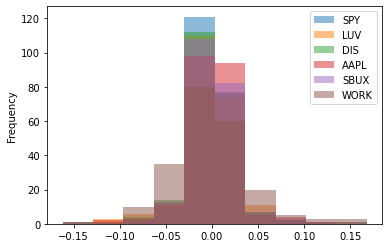

In [36]:
# Visualize the distribution of daily returns across all stocks using a histogram plot
# Hint: To make the plot easier to read, set the alpha arguement to 0.5
daily_returns_df.plot.hist(alpha = 0.5)

<AxesSubplot:ylabel='Density'>

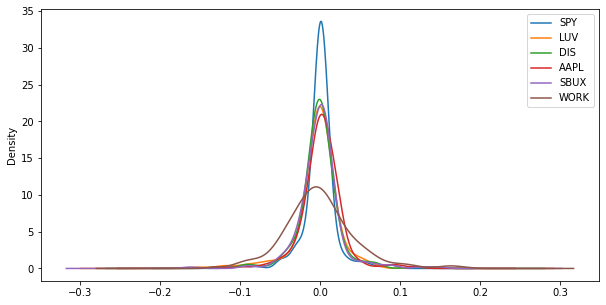

In [34]:
# Visualize the distribution of daily returns across all stocks using a density plot
daily_returns_df.plot.density(figsize = (10,5))